In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from helpers import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
prediction, data, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

In [88]:
# categorize data into subgroups based on characteristic feature 22
prediction_0, prediction_1, prediction_2, prediction_3, data_0, data_1, data_2, data_3, ids_0, ids_1, ids_2, ids_3 = categorize_data_feature_22(prediction, data, ids)
# print_statistics(data_0, data_1, data_2, data_3)

(99913, 30)
(77544, 30)
(0, 30)
(0, 30)


#### Data Cleaning and Preprocessing

In [61]:
low = 1
high = 99

In [3]:
# data with preprocessing
low = 1
high = 99
prediction_pp, x_pp = preprocess_data(data, prediction, low, high, False)
y_pp, tx_pp = build_model_data(prediction_pp, x_pp)

In [4]:
# data without preprocessing
x, _, _ = standardize(data)
y, tx = build_model_data(prediction, x)

### Exploratory Data Analysis

#### Plots

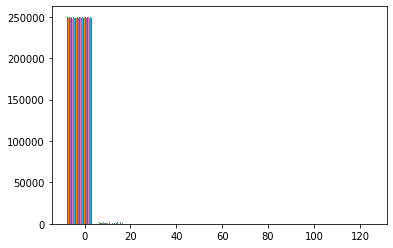

In [39]:
# complete histogram over all features
plt.hist(tx)
plt.show()

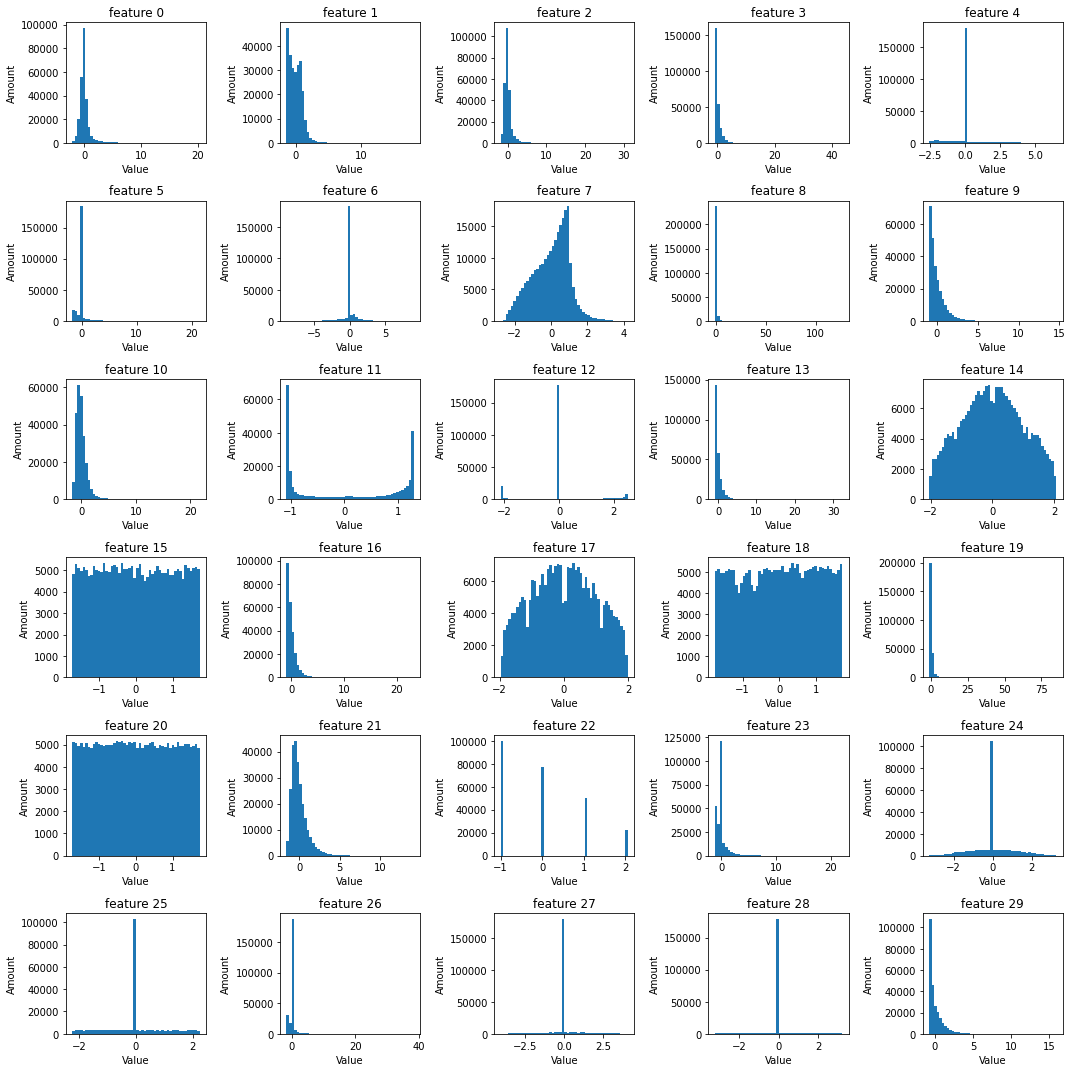

In [8]:
# plots raw data
fig, axes = plt.subplots(6, 5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.hist(tx[:, i + 1], bins=50)
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

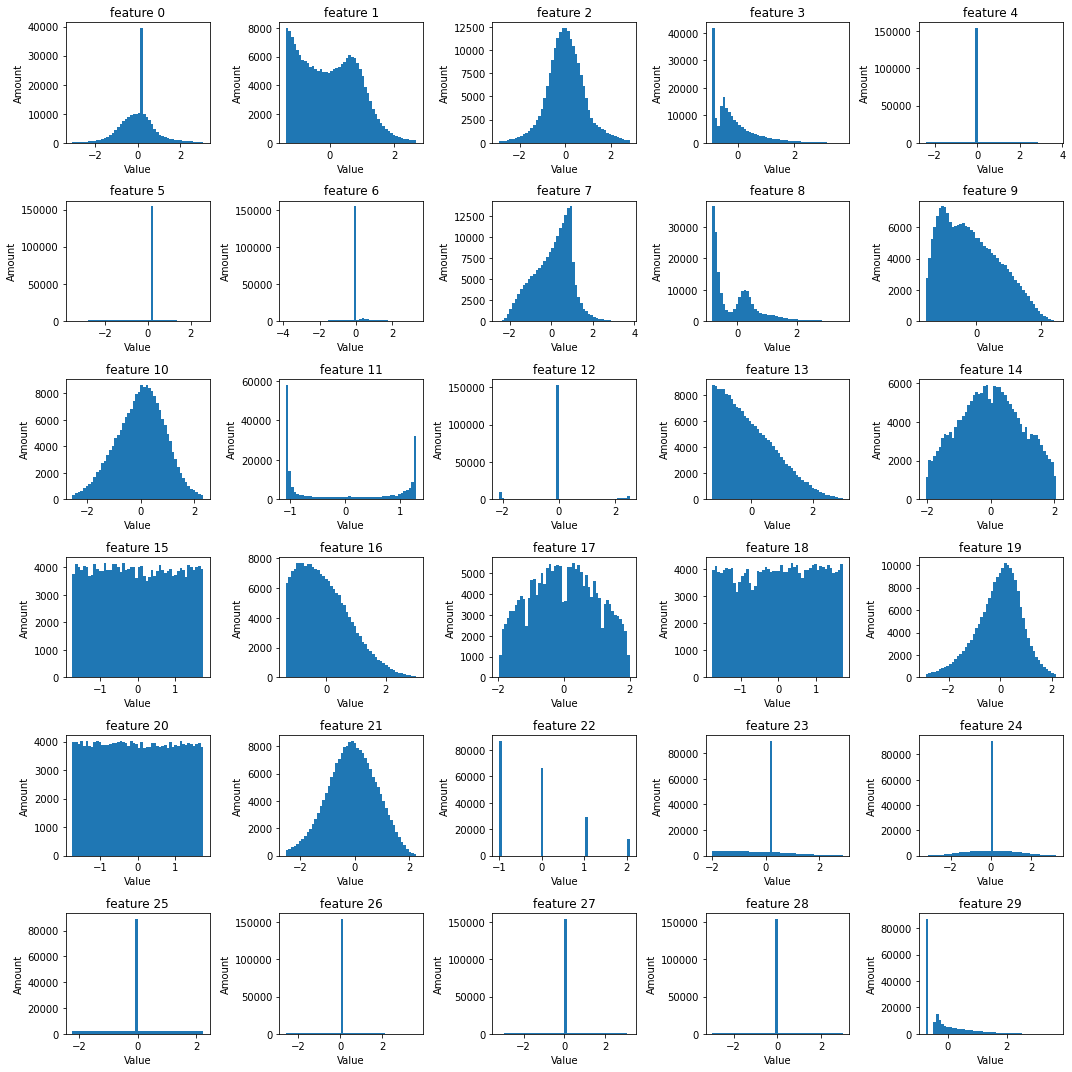

In [9]:
# plot data without outliers
fig, axes = plt.subplots(6, 5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.hist(tx_pp[:, i + 1], bins=50)
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

#### Least Squares

In [69]:
# Least Squares
least_squares_w, least_squares_loss = least_squares(y, tx)
(least_squares_w, least_squares_loss)

(array([-3.14664000e-01,  9.63458000e-03, -2.54719228e-01, -2.63502968e-01,
        -1.10181144e-03,  2.18423830e-02,  9.00537819e-02,  4.83490564e-03,
         2.82008766e-01, -2.81502578e-02, -3.29272040e+02, -1.88141151e-01,
         1.18065030e-01,  7.66172592e-02,  6.39648815e+01, -7.79460496e-04,
        -8.30656815e-04,  6.30807319e+01, -8.61168752e-04,  2.51791342e-03,
         1.03659311e-01,  9.33786120e-04, -4.70019025e-02,  4.17575954e-02,
        -4.75783460e-02,  6.50726410e-04,  1.88755846e-04, -3.66001845e-02,
         1.55837343e-03, -1.74318677e-03,  2.78938100e+02]),
 0.6808189043231061)

In [70]:
# calculate prediction
ypred = predict_labels(least_squares_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.744592

In [71]:
# Least Squares
least_squares_w_pp, least_squares_loss_pp = least_squares(y_pp, tx_pp)
(least_squares_w_pp, least_squares_loss_pp)

(array([-3.14664000e-01,  6.40515482e-02, -2.17276994e-01, -2.41419017e-01,
         6.71702636e-02,  2.25404817e-01, -1.82520358e-01, -2.27099064e-02,
         2.61127566e-01, -1.47263715e-02,  2.94893349e-01,  2.91234240e+00,
         9.68617787e-02,  7.02908103e-02,  2.51717720e+00, -6.91087195e-04,
        -1.33300063e-03, -1.93388189e+00, -9.69850132e-04,  2.89770571e-03,
        -1.85325500e-02,  1.24978747e-03, -1.34461919e-02, -1.02609175e-01,
         4.52708610e-02, -8.34496611e-05,  4.60603197e-04,  6.15219503e-02,
         1.11745056e-03, -8.28249883e-04, -1.89442147e-01]),
 0.6788496293889799)

In [74]:
# calculate prediction
ypred = predict_labels(least_squares_w_pp, tx_pp)
ypred = np.squeeze(ypred)

(ypred == y_pp).mean()

0.750256

#### Gradient Descent

In [136]:
# Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
initial_w = np.zeros(tx.shape[1])

gradient_w, gradient_loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)

Gradient Descent: execution time=13.464 seconds
Gradient Descend: final loss = 0.691531370619219


In [137]:
# calculate prediction
ypred = predict_labels(gradient_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.736968

#### Stochastic Gradient Descent

In [138]:
# Stochastic Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.01 # learning rate (if gamma too high (e.g. 0.1), there is no convergence)

# Initialization
initial_w = np.zeros(tx.shape[1])

sgd_w, sgd_loss = least_squares_SGD(y, tx, initial_w, max_iters, gamma)

SGD: execution time=15.332 seconds
Gradient Descend: final loss = 0.909120615045486


In [139]:
# calculate prediction
ypred = predict_labels(sgd_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.646956

In [143]:
# Stochastic Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.01 # learning rate (if gamma too high (e.g. 0.1), there is no convergence)

# Initialization
initial_w = np.zeros(tx_pp.shape[1])

sgd_w_pp, sgd_loss_pp = least_squares_SGD(y_pp, tx_pp, initial_w, max_iters, gamma)

(195365, 211)
(211,)
SGD: execution time=31.741 seconds
Gradient Descend: final loss = 3.0641298919135225e+94


In [145]:
# calculate prediction
ypred = predict_labels(sgd_w_pp, tx_pp)
ypred = np.squeeze(ypred)

(ypred == y_pp).mean()

0.43329664986051747

#### Ridge Regression

Progression... (0/15)
Progression... (1/15)
Progression... (2/15)
Progression... (3/15)
Progression... (4/15)
Progression... (5/15)
Progression... (6/15)
Progression... (7/15)
Progression... (8/15)
Progression... (9/15)
Progression... (10/15)
Progression... (11/15)
Progression... (12/15)
Progression... (13/15)
Progression... (14/15)
Ridge Regression Hypherparameter found: Lambda = 0.016378937069540647


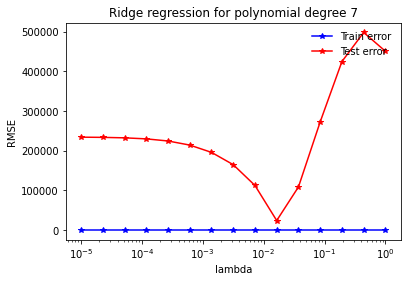

In [79]:
lambdas = np.logspace(-5, 0, 15)
seed = 56
degree = 7
split_ratio = 0.5

lambda_ = find_ridge_hyperparameters(y, tx, degree, split_ratio, seed, lambdas)# - gives below Lambda, takes a lot of time so made it a comment
#lambda_ = 0.037275937203149416 # best one according to above find_ridge_hyperparameters

ridge_w, ridge_loss = ridge_regression(y, tx, lambda_)

In [80]:
# calculate prediction
ypred = predict_labels(ridge_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.742368

Progression... (0/15)
Progression... (1/15)
Progression... (2/15)
Progression... (3/15)
Progression... (4/15)
Progression... (5/15)
Progression... (6/15)
Progression... (7/15)
Progression... (8/15)
Progression... (9/15)
Progression... (10/15)
Progression... (11/15)
Progression... (12/15)
Progression... (13/15)
Progression... (14/15)
Ridge Regression Hypherparameter found: Lambda = 0.037275937203149416


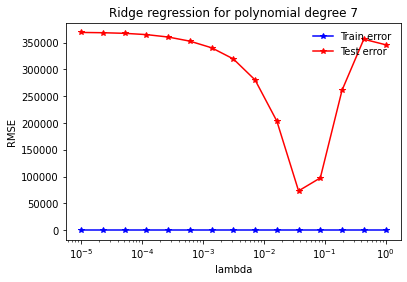

In [77]:
lambdas = np.logspace(-5, 0, 15)
seed = 56
degree = 7
split_ratio = 0.5

lambda_ = find_ridge_hyperparameters(y_pp, tx_pp[:, 1:], degree, split_ratio, seed, lambdas)# - gives below Lambda, takes a lot of time so made it a comment
#lambda_ = 0.037275937203149416 # best one according to above find_ridge_hyperparameters

ridge_w_pp, ridge_loss_pp = ridge_regression(y_pp, tx_pp, lambda_)

In [78]:
# calculate prediction
ypred = predict_labels(ridge_w_pp, tx_pp)
ypred = np.squeeze(ypred)

(ypred == y_pp).mean()

0.746252

#### Logistic regression

In [40]:
max_iter = 10000
threshold = 1e-8
gamma = 0.00001
losses = []

# build tx
# tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx_pp.shape[1], 1))

# start the logistic regression
for iter in range(max_iter):
    # get loss and update w.
    loss, w = log_learning_by_gradient_descent(y_pp, tx_pp, w, gamma)
    # log info
    if iter % 1 == 0:
        print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
    # converge criterion
    losses.append(loss)
    if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
        breaktx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1],tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regressio 1))

    # start the logistic regressio
        


[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Current iteration=0, loss=173286.79513998673
[[-2.73212825]
 [-0.91182246]
 [-5.09842844]
 ...
 [-2.275898  ]
 [-2.20770973]
 [-4.22605983]]
[[-2.73212825]
 [-0.91182246]
 [-5.09842844]
 ...
 [-2.275898  ]
 [-2.20770973]
 [-4.22605983]]
Current iteration=1, loss=-306512.2583114541
[[-4.60052424]
 [-1.24374508]
 [-8.16214199]
 ...
 [-3.41114916]
 [-1.54167527]
 [-5.41742643]]
[[-4.60052424]
 [-1.24374508]
 [-8.16214199]
 ...
 [-3.41114916]
 [-1.54167527]
 [-5.41742643]]
Current iteration=2, loss=-564812.311220042
[[ -5.46617192]
 [ -1.95119366]
 [-10.89868249]
 ...
 [ -4.74315445]
 [ -2.22926417]
 [ -7.61484186]]
[[ -5.46617192]
 [ -1.95119366]
 [-10.89868249]
 ...
 [ -4.74315445]
 [ -2.22926417]
 [ -7.61484186]]
Current iteration=3, loss=-780455.185163931
[[ -6.39434671]
 [ -2.52812273]
 [-13.65060406]
 ...
 [ -5.97792429]
 [ -2.6883273 ]
 [ -9.69465216]]
[[ -6.39434671]
 [ -2.52812273]
 [-13.65060406]


KeyboardInterrupt: 

#### Penalized logistic regression

In [9]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.0000002
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    #tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss dand update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        
        if iter % 1 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
            
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    #visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    #print("loss={l}".format(l=calculate_loss(y, tx, w)))


#### Cross Validation

In [7]:
seed = 1 
k_fold = 4 
degree = 1 # not used here in least squares 
lambda_ = 1**-1 # not used here in least squares

cross_validation_least_squares(y_pp, tx_pp, degree, seed, lambda_, k_fold)

[0.6788237508785215] [0.6790318330313456]


## Generate predictions and save ouput in csv format for submission:

In [42]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
prediction, data, ids_test = load_csv_data(DATA_TEST_PATH)

In [43]:
prediction, x = preprocess_data(data, prediction, low, high, False, poly_degree)
_, tx = build_model_data(prediction, x)

In [44]:
y_pred = predict_labels(least_squares_w_pp, tx)

In [45]:
OUTPUT_PATH = 'submission.csv' # TODO: fill in desired name of output file for submission
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)